## 1. Project Overview

This notebook performs a complete data science workflow on the Breast Cancer Wisconsin (Diagnostic) dataset.
It includes:

Data loading & exploration

Statistical & visual EDA

Data preprocessing

Feature engineering & correlation analysis

Dimensionality reduction (PCA)

Model training, evaluation & tuning

Explainability (SHAP & feature importance)

## Data Loading

In [4]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


## Missing Values & Duplicates

In [9]:
print("Missing values per column:")
print(df.isna().sum())

print("\nDuplicates:", df.duplicated().sum())


Missing values per column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dime

## Data Cleaning

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Drop ID and empty columns
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

# Encode target
le = LabelEncoder()
df['diagnosis_encoded'] = le.fit_transform(df['diagnosis'])
df = df.drop(columns=['diagnosis'])

print("Label encoding:", dict(zip(le.classes_, le.transform(le.classes_))))


Label encoding: {'B': 0, 'M': 1}


C:\Users\PC\AppData\Local\Temp\ipykernel_23056\99393242.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis_encoded', data=df, palette="Set2")


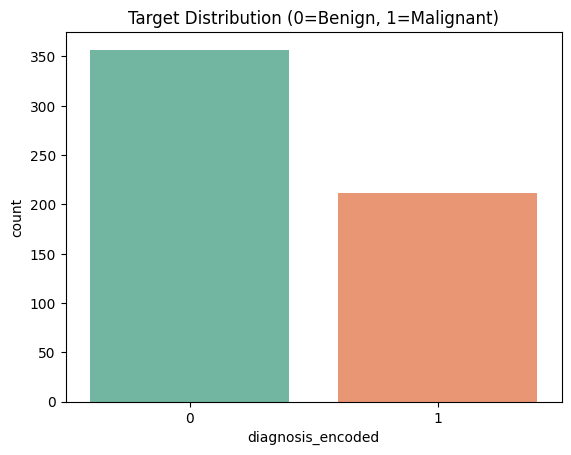

0    0.627417
1    0.372583
Name: diagnosis_encoded, dtype: float64

In [13]:
sns.countplot(x='diagnosis_encoded', data=df, palette="Set2")
plt.title("Target Distribution (0=Benign, 1=Malignant)")
plt.show()

df['diagnosis_encoded'].value_counts(normalize=True)


## Feature Disrtibutions

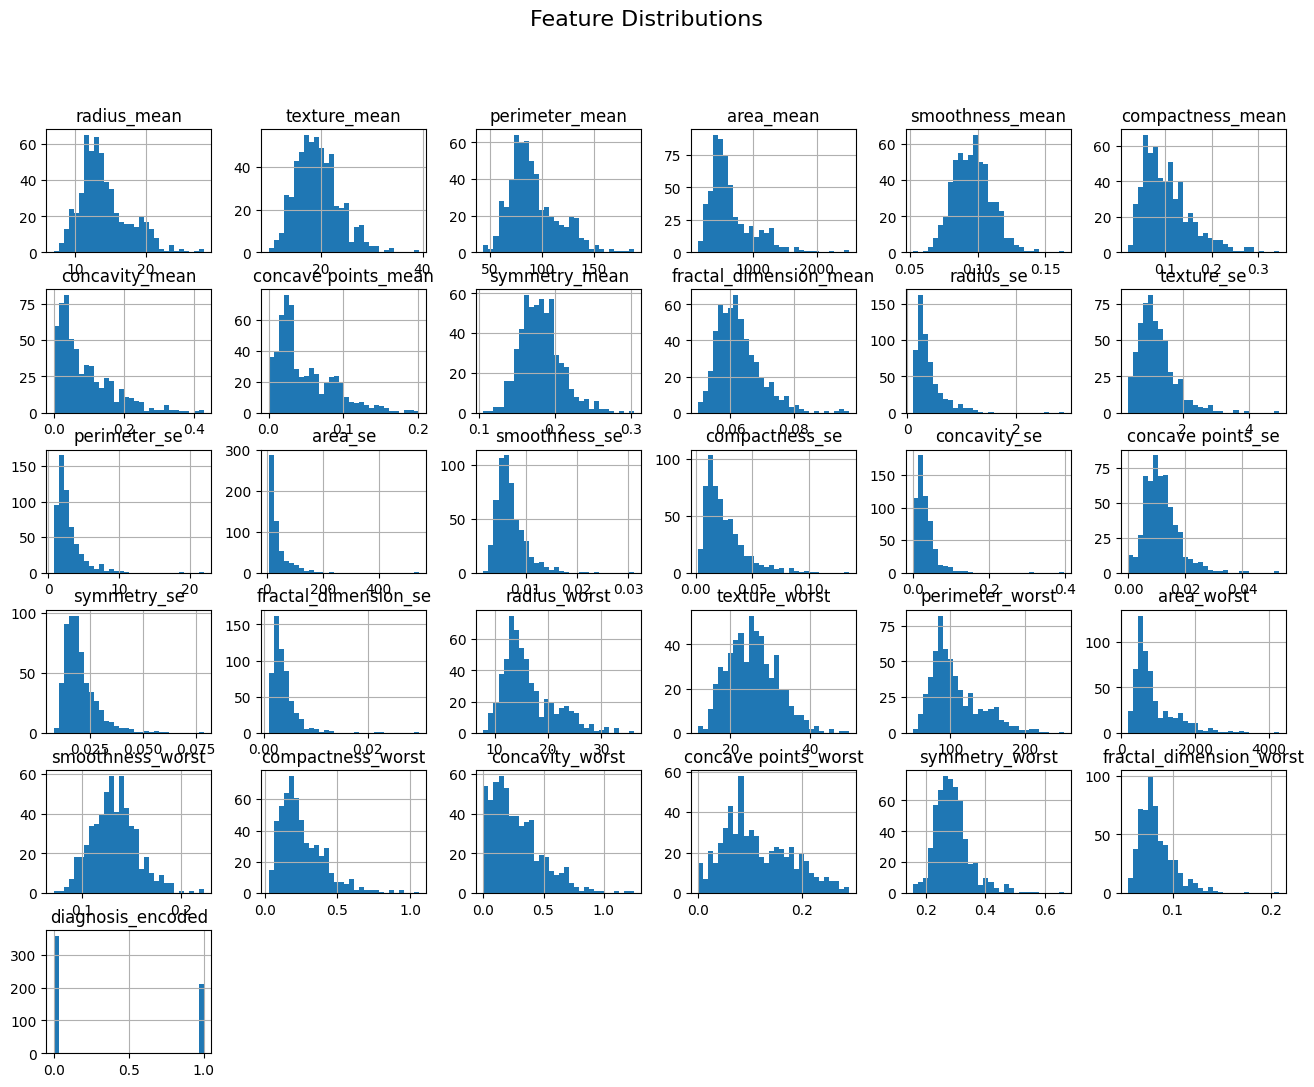

In [14]:
df.hist(figsize=(16, 12), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

## Correlation Analysis

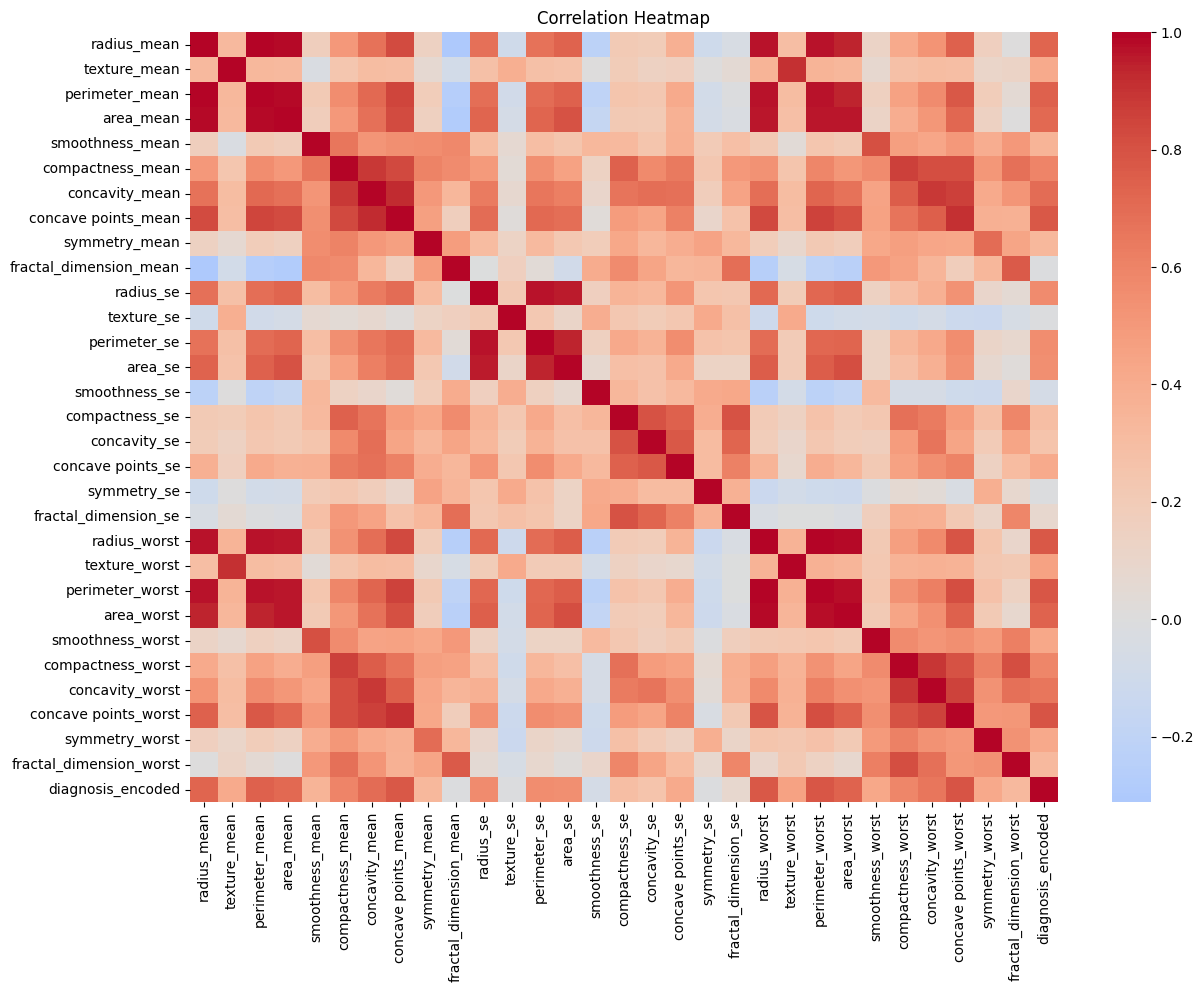

concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis_encoded, dtype: float64

In [15]:
corr = df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

# Correlation with target
corr_target = corr['diagnosis_encoded'].drop('diagnosis_encoded').sort_values(ascending=False)
corr_target.head(10)

## Top Correlated Features

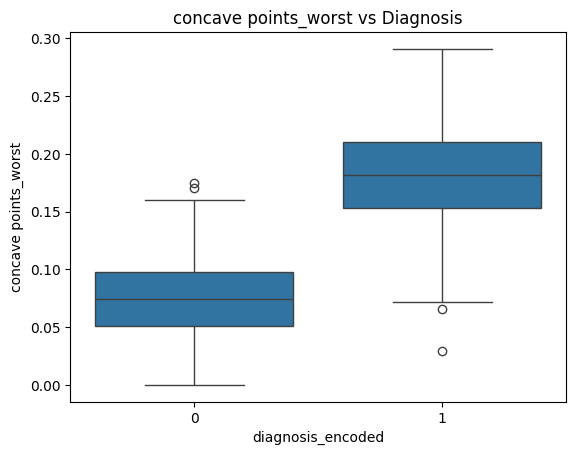

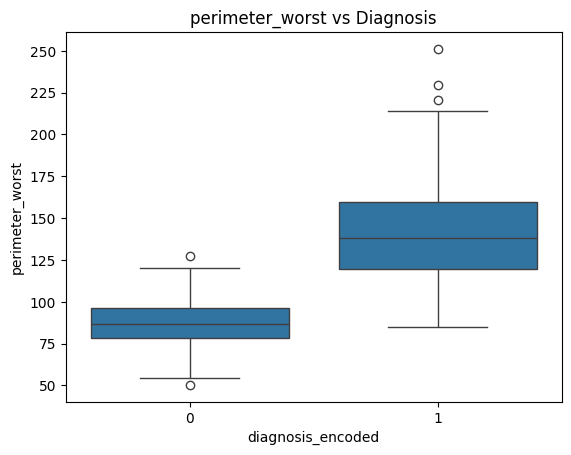

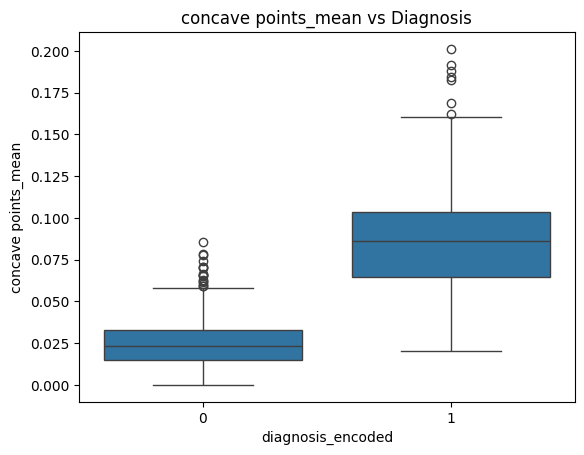

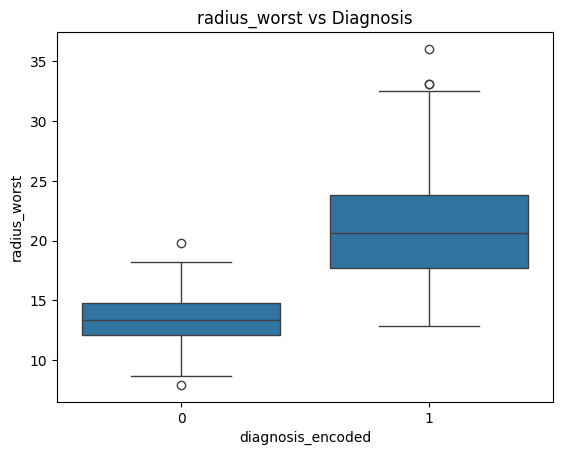

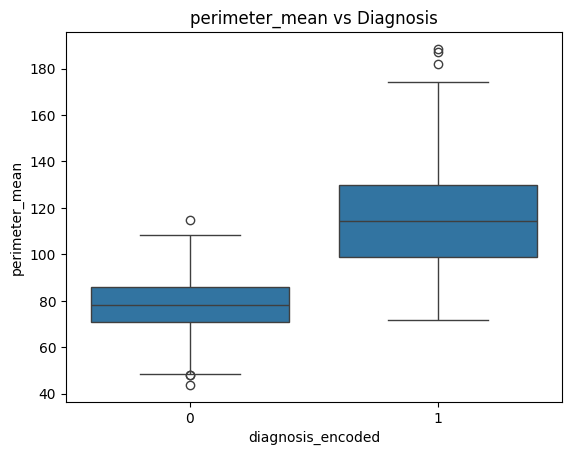

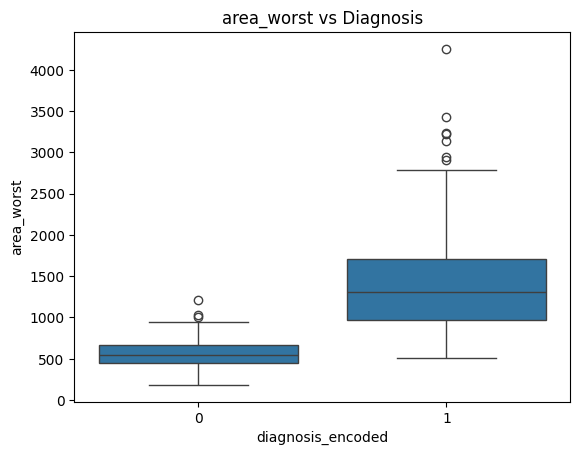

In [16]:
top_features = corr_target.head(6).index

for feature in top_features:
    sns.boxplot(x='diagnosis_encoded', y=feature, data=df)
    plt.title(f'{feature} vs Diagnosis')
    plt.show()


## Feature Engineering & Preprocessing

In [21]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [18]:
X = df.drop(columns=['diagnosis_encoded'])
y = df['diagnosis_encoded']

imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

X_imputed = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imputed)

## PCA Dimensionality Reduction

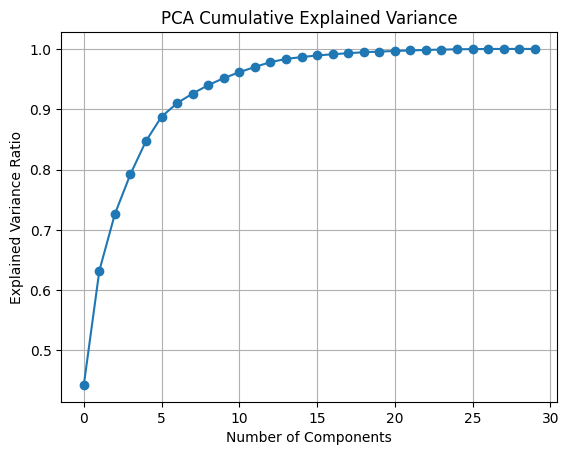

In [22]:
pca = PCA()
pca.fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("PCA Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

## Training

In [26]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

## Models Comparsion (Cross-Validation)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.pipeline import Pipeline

In [30]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy','f1','roc_auc']

results = {}
for name, model in models.items():
    pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('select', SelectKBest(f_classif, k=10)),
        ('model', model)
    ])
    scores = cross_validate(pipe, X, y, cv=cv, scoring=scoring)
    results[name] = {m: np.mean(scores[f'test_{m}']) for m in scoring}

results_df = pd.DataFrame(results).T.sort_values(by='roc_auc', ascending=False)
results_df


,accuracy,f1,roc_auc
Logistic Regression,0.950815,0.932240,0.989322
SVM,0.942012,0.918309,0.985041
Random Forest,0.945552,0.925555,0.984912
XGBoost,0.938519,0.917685,0.979077
Gradient Boosting,0.934995,0.911082,0.974876


## Hyperparameter Tuning

In [31]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best ROC AUC:", grid.best_score_)


Best Params: {'max_depth': 5, 'n_estimators': 100}
Best ROC AUC: 0.9903508771929825


## Best model selection

In [43]:
# Decide final best model after hyperparameter tuning
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Tuned Random Forest from GridSearch
rf_tuned = grid.best_estimator_

# Evaluate on test set
y_pred_rf = rf_tuned.predict(X_test)
if hasattr(rf_tuned, 'predict_proba'):
    y_proba_rf = rf_tuned.predict_proba(X_test)[:,1]
else:
    y_proba_rf = rf_tuned.decision_function(X_test)

rf_test_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'f1': f1_score(y_test, y_pred_rf),
    'roc_auc': roc_auc_score(y_test, y_proba_rf)
}

# Top model by cross-validation (earlier comparison)
cv_top = results_df.index[0]
cv_top_scores = results_df.iloc[0].to_dict()

print('Tuned Random Forest test metrics:', {k: round(v,3) for k,v in rf_test_metrics.items()})
print('Top CV model:', cv_top, 'with CV metrics:', {k: round(v,3) for k,v in cv_top_scores.items()})
print('Grid best params:', grid.best_params_)

# Simple selection rule: prefer model that shows better ROC AUC on held-out test (and good CV performance).
if rf_test_metrics['roc_auc'] >= cv_top_scores['roc_auc']:
    final_choice = ('Random Forest (tuned)', rf_test_metrics)
    reason = 'Tuned Random Forest has equal or higher ROC AUC compared to CV top model and was improved by grid search.'
else:
    final_choice = (cv_top, cv_top_scores)
    reason = 'Another model showed higher cross-validated ROC AUC; prefer the CV top model.'

print('Final selected model:', final_choice[0])
print('Reason:', reason)

Tuned Random Forest test metrics: {'accuracy': 0.974, 'f1': 0.963, 'roc_auc': 0.995}
Top CV model: Logistic Regression with CV metrics: {'accuracy': 0.951, 'f1': 0.932, 'roc_auc': 0.989}
Grid best params: {'max_depth': 5, 'n_estimators': 100}
Final selected model: Random Forest (tuned)
Reason: Tuned Random Forest has equal or higher ROC AUC compared to CV top model and was improved by grid search.


## Evalution on Testing data

Accuracy: 0.9736842105263158
F1: 0.9629629629629629
ROC AUC: 0.9950396825396824

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



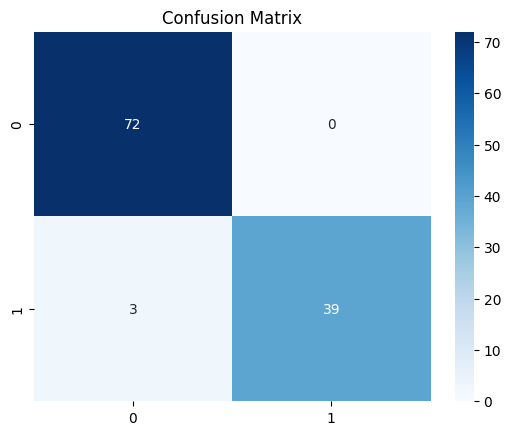

In [44]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [45]:
from sklearn.metrics import roc_curve

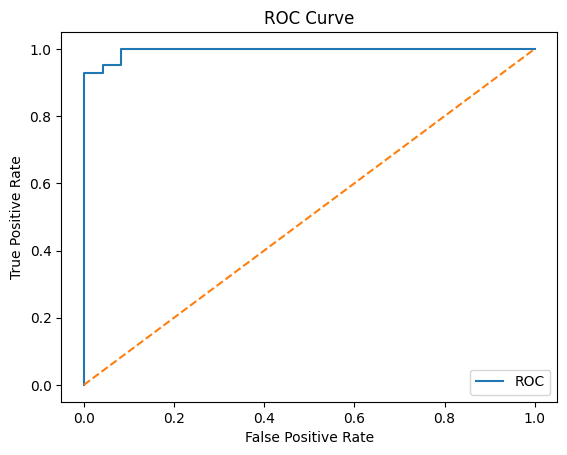

Optimal Threshold: 0.5165653858661738


In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC')
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Choose optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

## Feature Importance using SHAP values

In [38]:
import shap

d:\Program Files\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


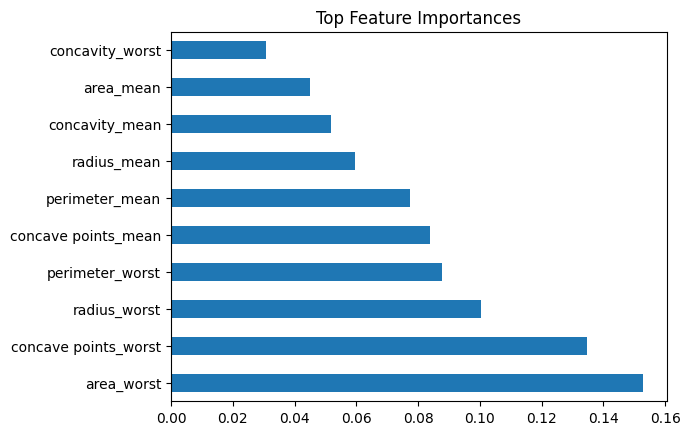

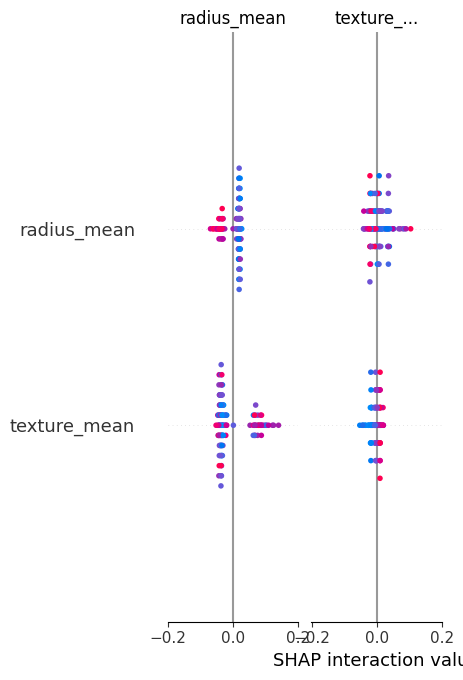

In [ ]:
# Feature importance
feat_imp = pd.Series(best_model.feature_importances_, index=df.drop(columns='diagnosis_encoded').columns)
feat_imp.sort_values(ascending=False).head(10).plot(kind='barh', title="Top Feature Importances")
plt.show()

# SHAP values
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=df.drop(columns='diagnosis_encoded').columns)


## Final model Saving & Cleaned Data extraction

In [ ]:
import joblib
joblib.dump(best_model, "final_breast_cancer_model.pkl")
pd.DataFrame(X_scaled, columns=df.drop(columns='diagnosis_encoded').columns).to_csv("breast_cancer_cleaned.csv", index=False)

print("Model and cleaned dataset saved successfully.")

Model and cleaned dataset saved successfully.
